O código acima ilustra o conceito de p-valor no contexto de um teste de hipóteses estatístico, utilizando o teste t para uma amostra (one-sample t-test). 

Esse código pode ser dividio nos seguintes passos:

1. **Geração da amostra**. Uma amostra de 30 valores é gerada a partir de uma distribuição normal com média (loc=5) e desvio padrão (scale=2). Esses dados simulam um conjunto de observações que queremos testar. O parâmetro np.random.seed(42) é usado para garantir que os resultados sejam reprodutíveis.

2. **Formulação do teste de hipóteses**. O teste t para uma amostra é usado para verificar se a média da amostra é estatisticamente diferente de uma média hipotética da população. Nesse caso, 
  - Hipótese nula ($𝐻_0$): A média da população é igual a 5
  - Hipótese alternativa ($𝐻_1$): A média da população é diferente de  5.

3. **Realização do teste t**. A função ttest_1samp da biblioteca scipy.stats calcula:
 - O estatístico t (t_stat): Mede a diferença padronizada entre a média da amostra e a média da população.
 - O p-valor (p_value): Indica a probabilidade de observarmos um valor tão extremo quanto o estatístico t, assumindo que $𝐻_0$ é verdadeira.

 4. **Interpretação do p-valor**. Essa interpretação é feito com base no nível de significância ($\alpha = 0.05$). Se $𝑝 < \alpha$, rejeitamos $𝐻_0$, porque há evidências estatísticas de que a média da amostra é diferente da média da população. Caso contrário, não rejeitamos $𝐻_0$, porque não há evidências suficientes para  afirmar que as médias são diferentes.

---

O código abaixo ainda produz uma visualização do p-valor. Essa visualização mostra:
- A distribuição t teórica (assumindo $𝐻_0$ verdadeira).
- As regiões críticas (áreas sob a curva onde o estatístico t é extremo).
- As linhas verticais representam o valor calculado da estatística $t$.

A área sombreada em vermelho corresponde ao p-valor, ou seja, a probabilidade de obter um valor da estatística $t$ tão extremo quanto o observado.

Sample mean: 4.62
T-statistic: -1.15
P-value: 0.2616


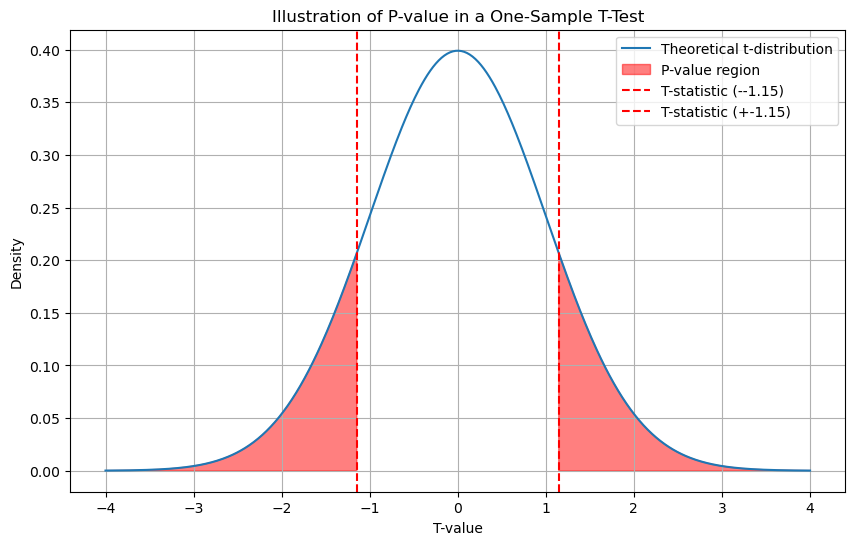

Fail to reject the null hypothesis: there is no significant evidence that the sample mean differs from the population mean.


In [1]:
import numpy as np
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt

# Step 1: Generate a random sample
np.random.seed(42)  # For reproducibility
sample = np.random.normal(loc=5, scale=2, size=30)  # Sample from a normal distribution
population_mean = 5  # Null hypothesis mean

# Step 2: Perform a one-sample t-test
t_stat, p_value = ttest_1samp(sample, population_mean)

# Step 3: Output results
print(f"Sample mean: {np.mean(sample):.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Step 4: Visualize the p-value
# Theoretical t-distribution under the null hypothesis
x = np.linspace(-4, 4, 500)
t_dist = np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)  # Standard normal approx. for visualization

# Two-tailed test critical region
alpha = 0.05  # Significance level
critical_value = np.abs(np.percentile(x, 100 * (1 - alpha / 2)))  # Approximation for visualization

plt.figure(figsize=(10, 6))
plt.plot(x, t_dist, label='Theoretical t-distribution')
plt.fill_between(x, 0, t_dist, where=(x < -np.abs(t_stat)) | (x > np.abs(t_stat)), color='red', alpha=0.5, label='P-value region')
plt.axvline(-np.abs(t_stat), color='red', linestyle='--', label=f'T-statistic (-{t_stat:.2f})')
plt.axvline(np.abs(t_stat), color='red', linestyle='--', label=f'T-statistic (+{t_stat:.2f})')
plt.title('Illustration of P-value in a One-Sample T-Test')
plt.xlabel('T-value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Interpretation
if p_value < alpha:
    print("Reject the null hypothesis: there is evidence that the sample mean is different from the population mean.")
else:
    print("Fail to reject the null hypothesis: there is no significant evidence that the sample mean differs from the population mean.")
